In [4]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [28]:
img = Image.open('test/00296.png')
img_arr = np.array(img)


In [60]:
# temp = np.array([])
temp = []

for i in glob('test/*.png'):
    img = Image.open(i)
    img_arr = np.array(img)
#     temp=np.stack((img_arr),axis=1)
    temp.append(img_arr)

In [61]:
np.array(temp).shape

(19, 512, 512, 3)

In [62]:
np.save('geekfile', temp) 

In [29]:
x_train=np.load('x_train.npy')

In [30]:
print ('before')
print(x_train.shape)

before
(32, 512, 512)


In [31]:
#x_train = np.array([[x_train]])
x_train = np.expand_dims(x_train, axis=0)
x_train.shape


(1, 32, 512, 512)

In [32]:
x_train = np.einsum('ijkl->jkli',x_train)

In [33]:
x_train

array([[[[1],
         [2],
         [2],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [1],
         [2],
         ...,
         [0],
         [0],
         [0]],

        [[4],
         [2],
         [1],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[3],
         [2],
         [2],
         ...,
         [0],
         [0],
         [0]],

        [[3],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [1],
         [2],
         ...,
         [0],
         [0],
         [0]]],


       [[[2],
         [2],
         [3],
         ...,
         [0],
         [0],
         [0]],

        [[2],
         [2],
         [2],
         ...,
         [0],
         [0],
         [0]],

        [[2],
         [2],
         [3],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[3],
         [2],
         [1],
         ...,
         [0],


In [34]:
x_train.shape

(32, 512, 512, 1)

In [11]:
x_train = np.einsum('ijkl->iklj', x_train)
print ('after')
print(x_train.shape)
print("\n")

after
(36, 512, 3, 512)




In [3]:
#l[0]
l.shape

(32, 512, 512)

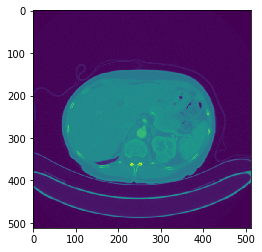

In [13]:
plt.imshow(l[3])
plt.show()

# nibabel file load

In [106]:
import nibabel as nib

In [107]:
x = nib.load("imaging.nii.gz")
y = nib.load("segmentation.nii.gz")

In [120]:
def overlay(volume_ims, segmentation_ims, segmentation, alpha):
    # Get binary array for places where an ROI lives
    segbin = np.greater(segmentation, 0)
    repeated_segbin = np.stack((segbin, segbin, segbin), axis=-1)
    # Weighted sum where there's a value to overlay
    overlayed = np.where(
        repeated_segbin,
        np.round(alpha*segmentation_ims+(1-alpha)*volume_ims).astype(np.uint8),
        np.round(volume_ims).astype(np.uint8)
    )
    return overlayed

In [121]:
vol = x.get_data()
seg = y.get_data()
seg = seg.astype(np.int32)

In [134]:
vol.shape[0]

602

In [130]:
x_grey = hu_to_grayscale(vol, -128, 128)
y_rgb = class_to_color(seg, [0,255,0], [255,0,0])

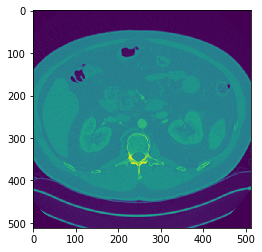

In [132]:
plt.imshow(vol[236])
plt.show()

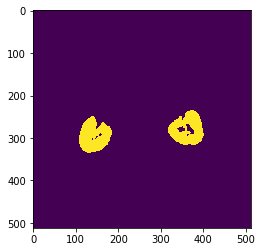

In [133]:
plt.imshow(seg[236])
plt.show()

In [109]:
def hu_to_grayscale(volume, hu_min, hu_max):
    # Clip at max and min values if specified
    if hu_min is not None or hu_max is not None:
        volume = np.clip(volume, hu_min, hu_max)

    # Scale to values between 0 and 1
    mxval = np.max(volume)
    mnval = np.min(volume)
    im_volume = (volume - mnval)/max(mxval - mnval, 1e-3)

    # Return values scaled to 0-255 range, but *not cast to uint8*
    # Repeat three times to make compatible with color overlay
    im_volume = 255*im_volume
    return np.stack((im_volume, im_volume, im_volume), axis=-1)

In [110]:
def class_to_color(segmentation, k_color, t_color):
    # initialize output to zeros
    shp = segmentation.shape
    seg_color = np.zeros((shp[0], shp[1], shp[2], 3), dtype=np.float32)

    # set output to appropriate color at each location
    seg_color[np.equal(segmentation,1)] = k_color
    seg_color[np.equal(segmentation,2)] = t_color
    return seg_color

In [138]:
for i in range(5):
    p = ("{:03d}.png".format(i))
    print(p)

000.png
001.png
002.png
003.png
004.png
